**Model Evaluation**

Before starting the model evaluation, here is the link to the community discussion about the accuracy on this data: https://www.kaggle.com/datasets/uciml/mushroom-classification/discussion/198420

Apparently, it was very easy to get 100% accuracy on this dataset.

In [1]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from main import model, y_pred, y_test, X, y

In [2]:
# Check the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9957805907172996

In [3]:
# Check the confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[1499,    0],
       [  12, 1333]])

In [4]:
# Check the classification report
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1499
           1       1.00      0.99      1.00      1345

    accuracy                           1.00      2844
   macro avg       1.00      1.00      1.00      2844
weighted avg       1.00      1.00      1.00      2844



Text(0, 0.5, 'True Positive Rate')

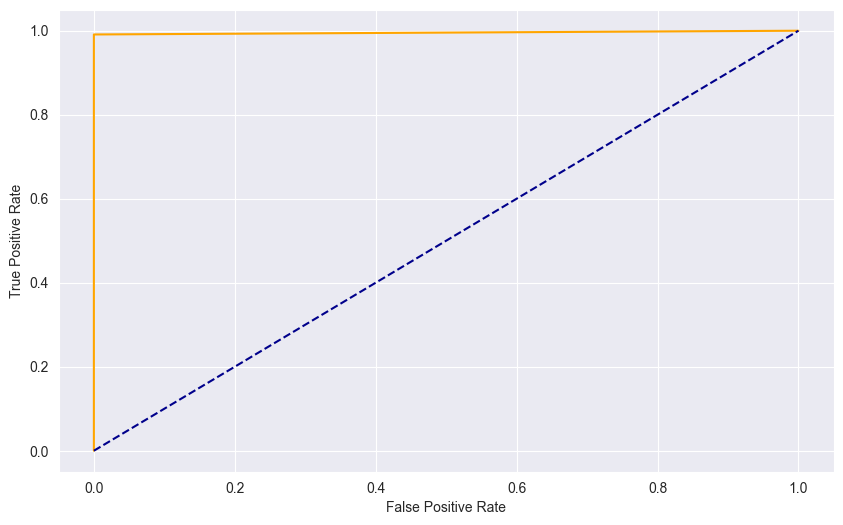

In [5]:
# Check the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


In [6]:
# Check the Cross Validation Score
from sklearn.model_selection import cross_val_score
from main import encoders

encoded_X = X.copy()
for col in X.columns:
    if col in encoders.keys():
        encoded_X[col] = encoders[col].transform(X[col])

# Now evaluate with your trained model
cross_val = cross_val_score(model, encoded_X, y, cv=7)
cross_val

array([0.75710594, 1.        , 0.99310939, 0.95348837, 0.99827586,
       1.        , 0.83448276])

Cross validation suggests that the model doesn't perfectly generalize, but most of the scores are nearly perfect.

To investigate further, we can use the stratified k-fold cross validation to maintain the class distribution. We can also check the feature importances to see if certain features dominate the model.

In [7]:
# First, check class distribution
print("Class distribution:\n" + str(pd.Series(y).value_counts(normalize=True)))

# Use StratifiedKFold to maintain class distribution
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=28)
strat_scores = cross_val_score(model, encoded_X, y, cv=skf)
print("Stratified CV scores:", strat_scores)

# Check feature importance to see if certain features dominate
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
print("\nFeature importances:\n", importances)

Class distribution:
0    0.517971
1    0.482029
Name: proportion, dtype: float64
Stratified CV scores: [0.99446154 0.99630769 0.99507692 0.99815385 0.99507389]

Feature importances:
                      feature  importance
4                       odor    0.199510
8                 gill-color    0.118491
11  stalk-surface-above-ring    0.109836
20                population    0.103008
19         spore-print-color    0.100018
7                  gill-size    0.099860
22             gill_combined    0.064211
18                 ring-type    0.046710
6               gill-spacing    0.034231
21                   habitat    0.027786
3                    bruises    0.017805
12  stalk-surface-below-ring    0.012677
14    stalk-color-below-ring    0.012233
17               ring-number    0.010987
9                stalk-shape    0.010297
10                stalk-root    0.009383
2                  cap-color    0.007417
13    stalk-color-above-ring    0.006377
16                veil-color    0.0034

The `odor` feature has a significant effect on the decision, but there is no unbalanced class distribution. The model is not overfitting, but it is not generalizing perfectly either.

The reason for this phenomenon is probably the seperability of the data. The data is very clean and the classes are easily separable. This is why the model can easily achieve 100% accuracy while performing bad on unbalanced folds.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'cap-shape'),
  Text(1, 0, 'cap-surface'),
  Text(2, 0, 'cap-color'),
  Text(3, 0, 'bruises'),
  Text(4, 0, 'odor'),
  Text(5, 0, 'gill-attachment'),
  Text(6, 0, 'gill-spacing'),
  Text(7, 0, 'gill-size'),
  Text(8, 0, 'gill-color'),
  Text(9, 0, 'stalk-shape'),
  Text(10, 0, 'stalk-root'),
  Text(11, 0, 'stalk-surface-above-ring'),
  Text(12, 0, 'stalk-surface-below-ring'),
  Text(13, 0, 'stalk-color-above-ring'),
  Text(14, 0, 'stalk-color-below-ring'),
  Text(15, 0, 'veil-type'),
  Text(16, 0, 'veil-color'),
  Text(17, 0, 'ring-number'),
  Text(18, 0, 'ring-type'),
  Text(19, 0, 'spore-print-color'),
  Text(20, 0, 'population'),
  Text(21, 0, 'habitat'),
  Text(22, 0, 'gill_combined')])

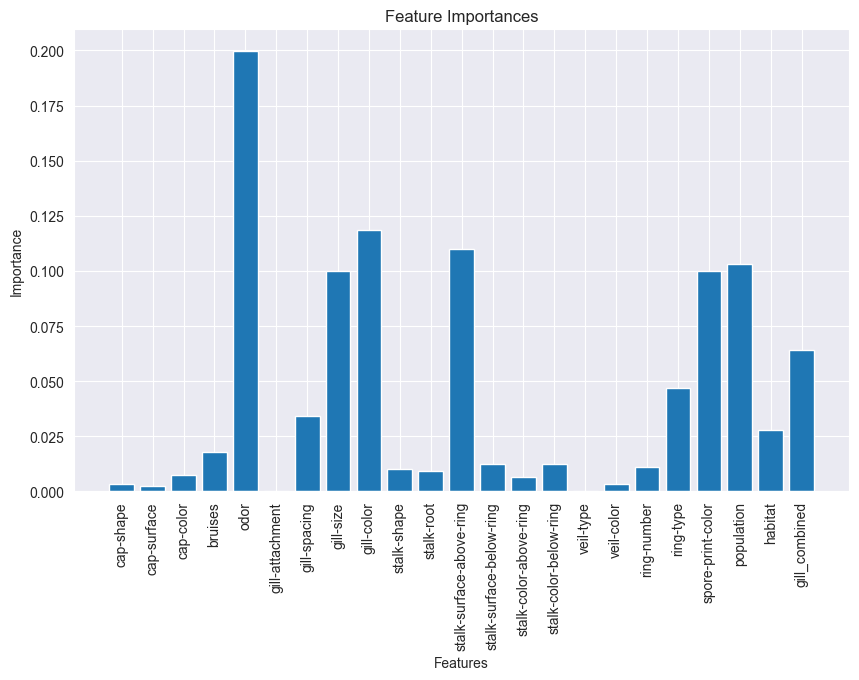

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(X.columns, model.feature_importances_)

plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')

plt.xticks(rotation=90)


**Conclusion**

The model correctly achieves 100% accuracy on the test set, although we used a very simple and low-complexity model (Random forest with 10 trees and with max_depth = 6). The reason for this is the separability of the data. The model is not overfitting, but it is not generalizing perfectly either. The model is not affected by class imbalance, but it is affected by the separability of the data.